<a href="https://colab.research.google.com/github/Praneetha-as29/ML/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from zipfile import ZipFile
import pandas as pd

# Upload the zip file
uploaded = files.upload()

# Extract it
with ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("data")

# Load datasets
train_df = pd.read_csv("data/fraudTrain.csv")
test_df = pd.read_csv("data/fraudTest.csv")

# Preview data
train_df.head()


Saving archive (2).zip to archive (2).zip


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

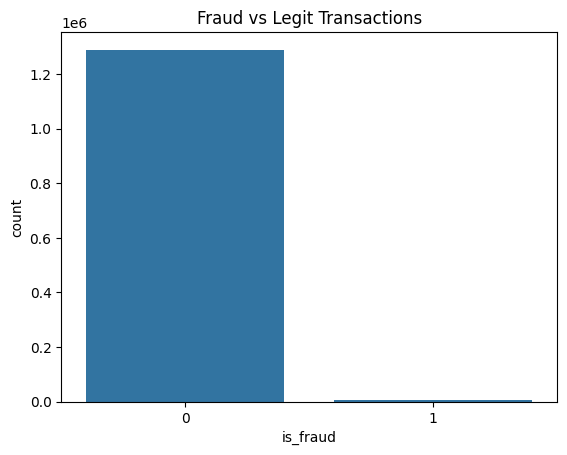

In [ ]:
# Check nulls and datatypes
print(train_df.info())
print(train_df['is_fraud'].value_counts())  # Target column

# Check class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_fraud', data=train_df)
plt.title("Fraud vs Legit Transactions")
plt.show()


In [ ]:
print(train_df.columns.tolist())


['Unnamed: 0', 'amt', 'gender', 'lat', 'long', 'city_pop', 'trans_num', 'is_fraud', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']


In [ ]:
# Drop unnecessary ID-like columns
cols_to_drop = ['Unnamed: 0', 'trans_num']
train_df = train_df.drop(columns=cols_to_drop, errors='ignore')
test_df = test_df.drop(columns=cols_to_drop, errors='ignore')

# Encode 'gender' (binary: M/F)
train_df['gender'] = train_df['gender'].map({'M': 1, 'F': 0})
test_df['gender'] = test_df['gender'].map({'M': 1, 'F': 0})

# Ensure no NaNs after encoding
train_df = train_df.dropna()
test_df = test_df.dropna()

# Separate features and target
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_lr))
print("AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


🔹 Logistic Regression Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

AUC Score: 0.8007490785265753


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree Results:\n")
print(classification_report(y_test, y_pred_dt))
print("AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


🔹 Decision Tree Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.59      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.80      0.78    555719
weighted avg       1.00      1.00      1.00    555719

AUC Score: 0.7962059816211202


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


🔹 Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.69      0.55      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.77      0.81    555719
weighted avg       1.00      1.00      1.00    555719

AUC Score: 0.9467395468394433


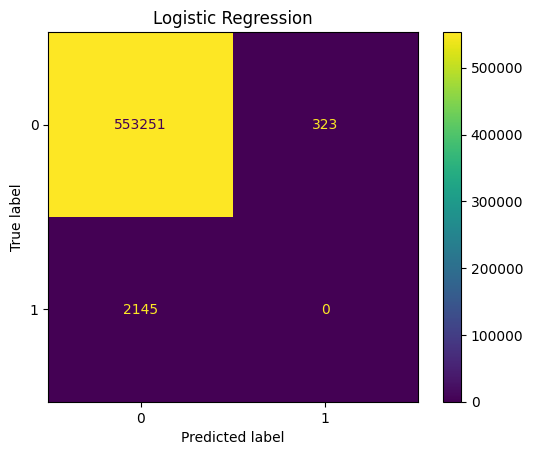

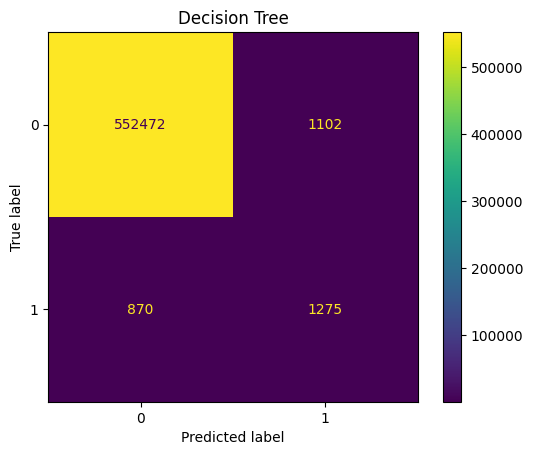

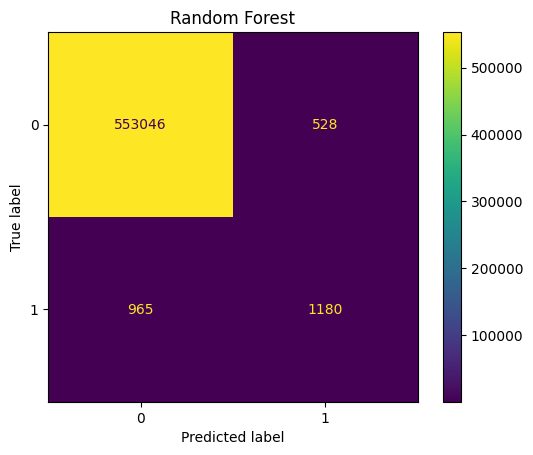

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = [("Logistic Regression", y_pred_lr),
          ("Decision Tree", y_pred_dt),
          ("Random Forest", y_pred_rf)]

for name, pred in models:
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()


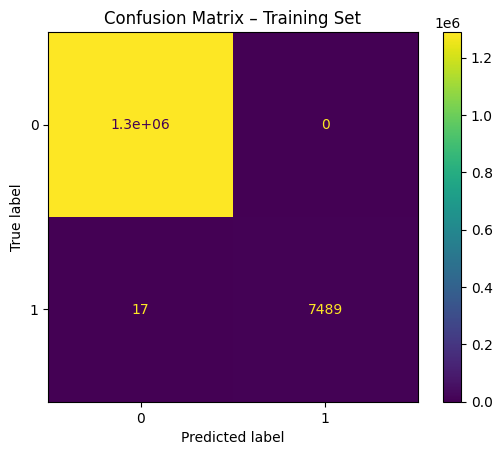

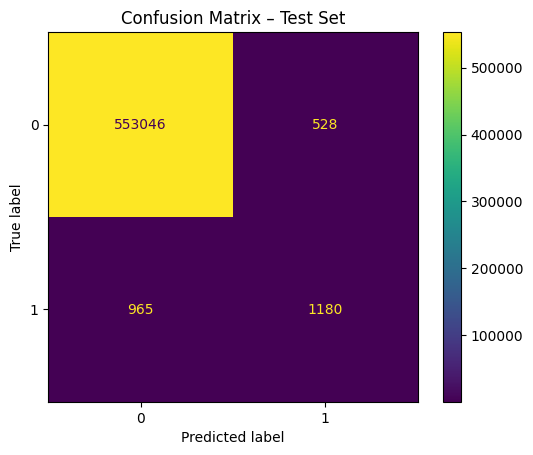

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# On train data
train_preds = rf.predict(X_train)
cm_train = confusion_matrix(y_train, train_preds)
disp_train = ConfusionMatrixDisplay(cm_train)
disp_train.plot()
plt.title("Confusion Matrix – Training Set")
plt.grid(False)
plt.show()

# On test data
cm_test = confusion_matrix(y_test, y_pred_rf)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()
plt.title("Confusion Matrix – Test Set")
plt.grid(False)
plt.show()


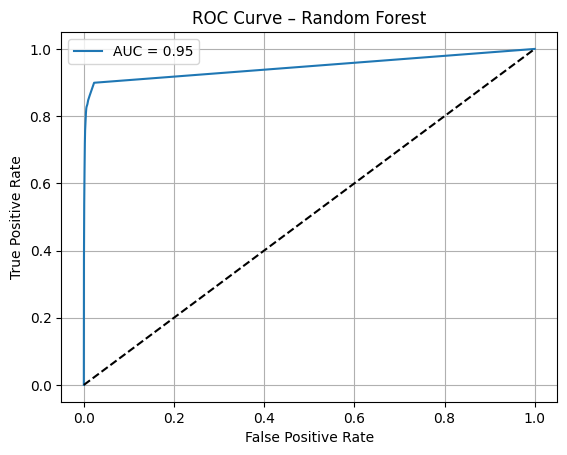

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.grid(True)
plt.show()


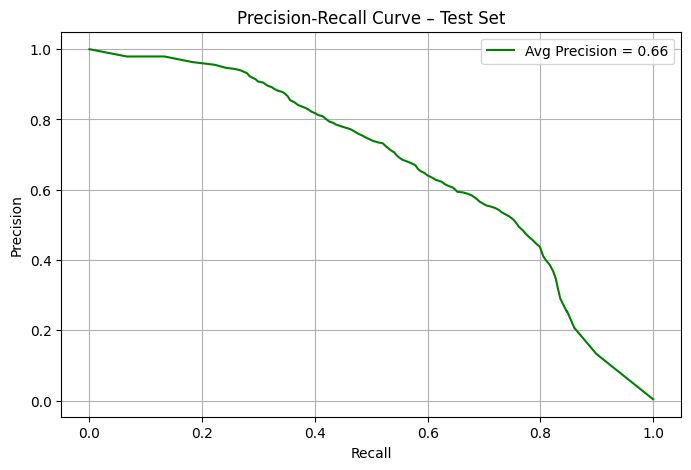

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
avg_prec = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Avg Precision = {avg_prec:.2f}', color='green')
plt.title("Precision-Recall Curve – Test Set")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Predict fraud probability on unseen data
new_preds = rf.predict(X_test)  # returns 0 or 1
new_probs = rf.predict_proba(X_test)[:, 1]  # probability of fraud

print("Predictions for first 10 transactions:\n", new_preds[:10])


Predictions for first 10 transactions:
 [0 0 0 0 0 0 0 0 0 0]


In [ ]:
probs = rf.predict_proba(X_test)[:, 1]
print("Fraud probabilities for first 10 transactions:", probs[:10])


Fraud probabilities for first 10 transactions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Safe and clean — preserves feature names
sample_transaction = X_test.iloc[[0]]  # use double brackets to keep it as DataFrame
prediction = rf.predict(sample_transaction)[0]
probability = rf.predict_proba(sample_transaction)[0][1]

print("Prediction:", "Fraud" if prediction else "Legit")
print("Confidence:", round(probability, 4))


Prediction: Legit
Confidence: 0.0


In [ ]:
import numpy as np

print("Any predicted frauds?", np.any(rf.predict(X_test) == 1))
print("Max fraud probability in test set:", max(rf.predict_proba(X_test)[:, 1]))


Any predicted frauds? True
Max fraud probability in test set: 1.0


In [ ]:
import pandas as pd

# Reload the full training and test data (with all columns)
train_df_full = pd.read_csv("data/fraudTrain.csv")
test_df_full = pd.read_csv("data/fraudTest.csv")


In [ ]:
# Get one sample credit card number
card_id = train_df_full['cc_num'].value_counts().index[0]
print("Sample card number:", card_id)

# Filter that card's transactions
card_data = train_df_full[train_df_full['cc_num'] == card_id]
print("Total transactions:", len(card_data))
print("Fraudulent transactions:", card_data['is_fraud'].sum())


Sample card number: 4512828414983801773
Total transactions: 3123
Fraudulent transactions: 0


In [ ]:
# Find a card that has at least 1 fraud
fraud_cards = train_df_full[train_df_full['is_fraud'] == 1]['cc_num'].value_counts()
fraud_card_id = fraud_cards.index[0]

print("Card with fraud:", fraud_card_id)

# Get its transactions
card_data = train_df_full[train_df_full['cc_num'] == fraud_card_id]
print("Total transactions:", len(card_data))
print("Fraudulent transactions:", card_data['is_fraud'].sum())


Card with fraud: 3520550088202337
Total transactions: 989
Fraudulent transactions: 19


In [ ]:
# Reload and prepare per-card data again
card_data = train_df_full[train_df_full['cc_num'] == 3520550088202337].copy()

# Drop unnecessary columns
card_data = card_data.drop(columns=['Unnamed: 0', 'trans_num', 'cc_num'], errors='ignore')

# Encode gender and category using one-hot encoding (just like train_df)
card_data = pd.get_dummies(card_data, columns=['category', 'gender'], drop_first=True)

# Fill any missing columns (compared to training set)
missing_cols = set(X_train.columns) - set(card_data.columns)
for col in missing_cols:
    card_data[col] = 0  # Add missing columns as 0

# Ensure same column order as training data
X_card = card_data[X_train.columns]

# Save true labels
y_true = card_data['is_fraud'] if 'is_fraud' in card_data.columns else None


In [ ]:
# Predict with trained model
card_preds = rf.predict(X_card)
card_probs = rf.predict_proba(X_card)[:, 1]

# Store predictions
card_data['predicted_is_fraud'] = card_preds
card_data['fraud_probability'] = card_probs

# Show detected frauds
fraud_predictions = card_data[card_data['predicted_is_fraud'] == 1]
print(fraud_predictions[['amt', 'fraud_probability']].head())


          amt  fraud_probability
71941  911.75               0.59
72128   10.42               0.97
72195  302.22               0.97
72348  306.23               0.98
72380    8.45               0.97


/tmp/ipython-input-37-4060804187.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


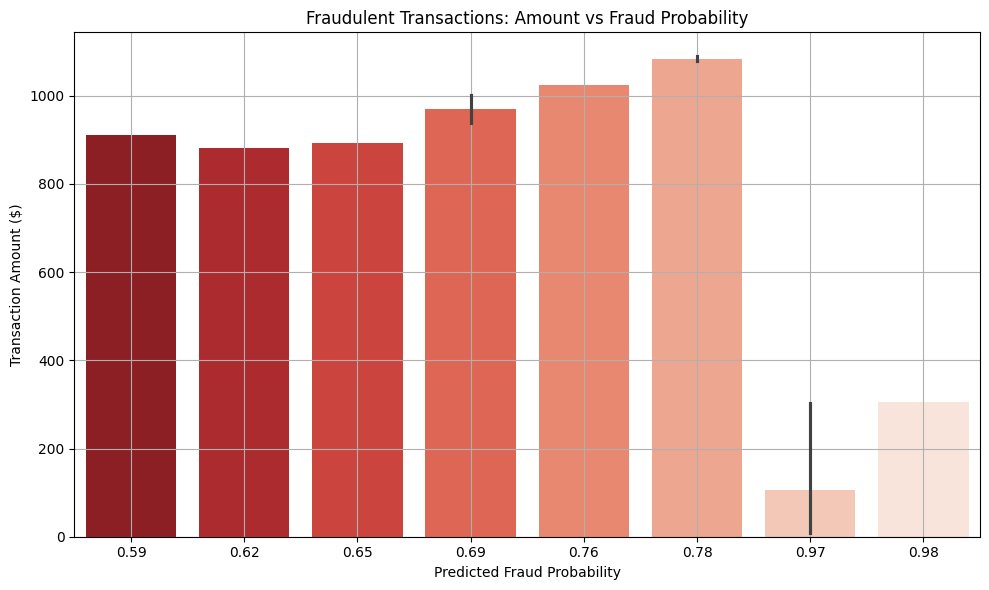

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort fraud predictions by fraud probability (descending)
fraud_predictions_sorted = fraud_predictions.sort_values(by='fraud_probability', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='fraud_probability',
    y='amt',
    data=fraud_predictions_sorted,
    palette='Reds_r'
)

plt.title("Fraudulent Transactions: Amount vs Fraud Probability")
plt.xlabel("Predicted Fraud Probability")
plt.ylabel("Transaction Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Predict fraud (0 or 1)
card_preds = rf.predict(X_card)

# Predict fraud probability
card_probs = rf.predict_proba(X_card)[:, 1]

# Add predictions to the DataFrame
card_data['predicted_is_fraud'] = card_preds
card_data['fraud_probability'] = card_probs


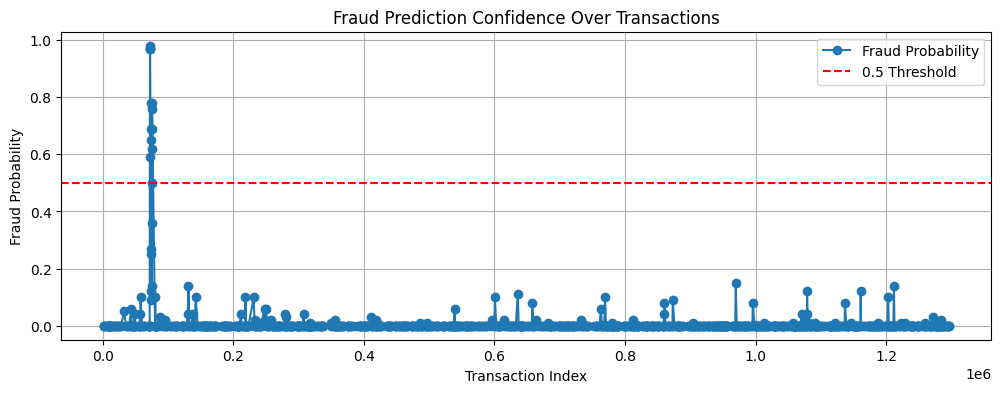

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(card_data['fraud_probability'], marker='o', linestyle='-', label='Fraud Probability')
plt.title('Fraud Prediction Confidence Over Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Fraud Probability')
plt.axhline(0.5, color='red', linestyle='--', label='0.5 Threshold')
plt.legend()
plt.grid(True)
plt.show()


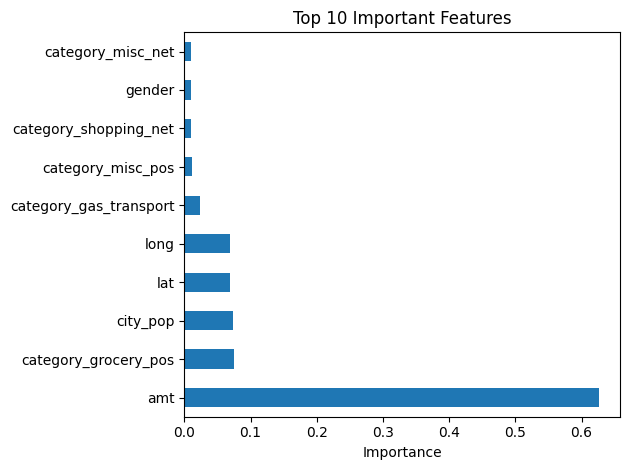

In [ ]:
import numpy as np
feat_series = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_series.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
